### Nome: Filipe Albanes Nobre Santos 
### RM: 94377

# **Checkpoint 01 - Modelagem de Dados e Aprendizagem de Máquina**

## **Objetivo**
Avaliar conceitos sobre Modelagem de dados e Aprendizado de Máquina (ML) adquiridos no curso.

## **Descrição do Desafio**
Você foi contratado por uma empresa que desenvolveu uma plataforma de compra e venda de carros usados. O funcionamento é bem simples, os usuários cadastram o carro que querem vender e esperam que outro usuário os compre, a empresa então fica com uma parte do valor de venda. Seu papel é desenvolver um modelo que possa determinar qual o melhor preço de venda para um usado.

Para nortear o desenvolvimento, você precisa de um ponto de partida e determinou uma pergunta chave: **Qual o preço de venda de um veículo Volkswagen Sedan 2.0 a gasolina, ano 2005, com cerca de 172095 km rodados?**

### **Orientações**
Para responder a essa pergunta, você deve utilizar o dataset da empresa, que está representado no arquivo **carros.csv**, e seguir o roteiro proposto neste desafio.

---
---
---

- **Importação de bibliotecas e demais definições**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np


#treino/teste
from sklearn.model_selection import train_test_split


#modelos
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.dummy import DummyRegressor
from xgboost import XGBRegressor # pip install xgboost


#métricas
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import scipy.stats as stats


#avisos desnecessários
import warnings
warnings.filterwarnings('ignore')


#demais funções
def bold(txt):
    print('\033[1m' + txt + '\033[0m')
    
def metricas(y_test, y_pred):
    return print(f'MAE=>  {mean_absolute_error(y_test, y_pred):,.2f}\nMAPE=> {mean_absolute_percentage_error(y_test, y_pred):,.2f}\nRMSE=> {np.sqrt(mean_absolute_error(y_test, y_pred)):,.2f}\nR2=>   {r2_score(y_test, y_pred):,.2f}')
    
    
#seed numpy
SEED = 22


df = pd.read_csv(r'C:\Users\Filipe\OneDrive_1_07-03-2023\carros.csv')
init_size = len(df)

---
---
---

## **Exploração de Dados - 2 pontos**

**1** - Carregue o dataset e faça a inspeção nas 15 primeiras linhas para identificação dos atributos. Quantos dados existem nesse dataset? Qual a quantidade de atributos? Existem valores faltantes? De que tipo são os dados? (1,0)

> **Carregue o dataset e faça a inspeção nas 15 primeiras linhas para identificação dos atributos**

In [2]:
primeira_quinzena = df.head(15)
primeira_quinzena

,Brand,Price,Body,Mileage/1000,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV


> **Quantos dados existem nesse dataset?**<br><br>
> **Qual a quantidade de atributos?** <br><br>
> **Existem valores faltantes?**<br><br>
> **De que tipo são os dados?**

In [3]:
qtd_dados = len(df)
qtd_atributos = len(df.count())
existe_nulo = df.isnull().values.any()
tipos_dados = df.dtypes
num_nulos = sum(df.isnull().sum())

bold(f'Quantidade de dados => {qtd_dados}\nQuantidade de atributos => {qtd_atributos} por conjunto')
bold(f'Existe valores faltantes => {"Sim" if existe_nulo == True else "Não"}\n')
bold(f'**Tipos dos dados:** \n\n{tipos_dados}')

Quantidade de dados => 4345
Quantidade de atributos => 9 por conjunto
Existe valores faltantes => Sim

**Tipos dos dados:** 

Brand            object
Price           float64
Body             object
Mileage/1000      int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object


---
---
---


**2** - Note que os dataset está no sistema americano. Converta os dados para o sistema métrico e altere o cabeçalho de forma que os dados façam sentido. (1,0)

Obs: Os dados de Milhas dividos por mil, ou seja, multiplique o valor por 1.000 para ter o valor real!

In [4]:
## Novo dataframe convertido para o português
df2 = pd.read_csv(r'C:\Users\Filipe\Downloads\OneDrive_1_07-03-2023\carros.csv')
novo = ['Marca','Preco','Tipo','KM/1000','Valvulas','Combustivel','Registro','Ano','Modelo']
df2 = df2.rename(columns={list(df.columns.values)[i] : novo[i] for i in range(len(novo))})

## Alterando milhas para kilometros
df2['KM/1000'] = df2['KM/1000'].apply(lambda y:round(y * 1.60934,2))

## Traduzindo os demais valores contidos nas colunas já traduzidas
df2['Combustivel'] = df2['Combustivel'].replace('Petrol','Gasolina').replace('Other','Outro').replace('Gas','GLP')
df2['Registro'] = df2['Registro'].replace('yes','sim').replace('no','nao')
df2['Tipo'] = df2['Tipo'].replace('other','outro')

- Dados convertidos para o sistema métrica e língua portuguesa.
- Não é informado se o **preço** está cotado em dólar ou real, portanto, não faremos alterações nesta coluna.

In [5]:
df2

,Marca,Preco,Tipo,KM/1000,Valvulas,Combustivel,Registro,Ano,Modelo
0,BMW,4200.0,sedan,445.79,2.0,Gasolina,sim,1991,320
1,Mercedes-Benz,7900.0,van,687.19,2.9,Diesel,sim,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,576.14,5.0,GLP,sim,2003,S 500
3,Audi,23000.0,crossover,386.24,4.2,Gasolina,sim,2007,Q7
4,Toyota,18300.0,crossover,193.12,2.0,Gasolina,sim,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,14.48,3.0,Diesel,sim,2014,S 350
4341,BMW,6500.0,sedan,1.61,3.5,Gasolina,sim,1999,535
4342,BMW,8000.0,sedan,312.21,2.0,Gasolina,sim,1985,520
4343,Toyota,14200.0,sedan,49.89,NaN,Gasolina,sim,2014,Corolla


---
---
---

## **Análise descritiva dos dados - 2 pontos**

3 - Faça uma análise exploratória dos dados, utilizando gráficos e tabelas para realizar correlações entre os atributos e que permitam criar um cenário de correlação entre eles.

### Outliers

- O tratamento será feito com base na discrepância entre os valores médios do desvio padrão * 2 dos valores da coluna.

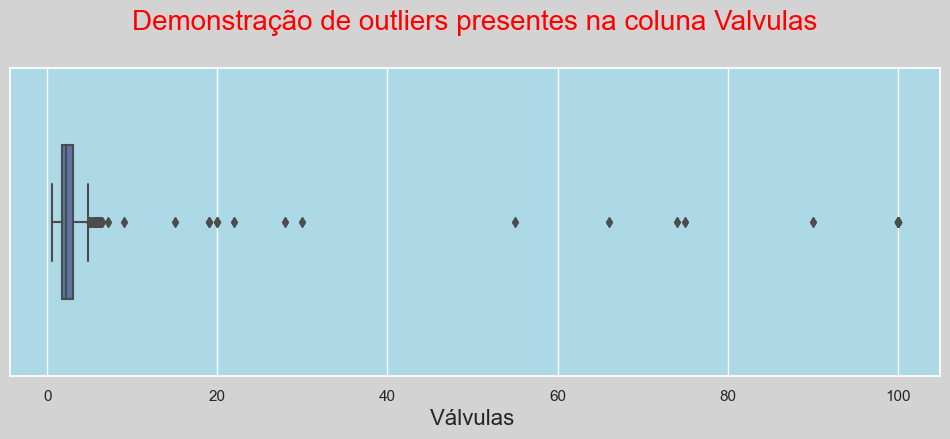

In [6]:
df_antigo = df
df = df2
sns.set_style("darkgrid")
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgrey'})

plt.figure(figsize=(12,4))
fig1 = sns.boxplot(x=df["Valvulas"],width=0.5)
tam1 = len(df['Valvulas'])
fig1.set_title('Demonstração de outliers presentes na coluna Valvulas\n',fontsize=20, color='red')
fig1.set_xlabel('Válvulas ', fontsize=16)
plt.show()

- Removendo os outliers com base na diferença entre o desvio padrão médio * 2




In [7]:
z = stats.zscore(df['Valvulas'],nan_policy='omit')
outliers = z.loc[np.abs(z) > 2]
df = df.drop(outliers.keys())
tam2 = len(df['Valvulas'])

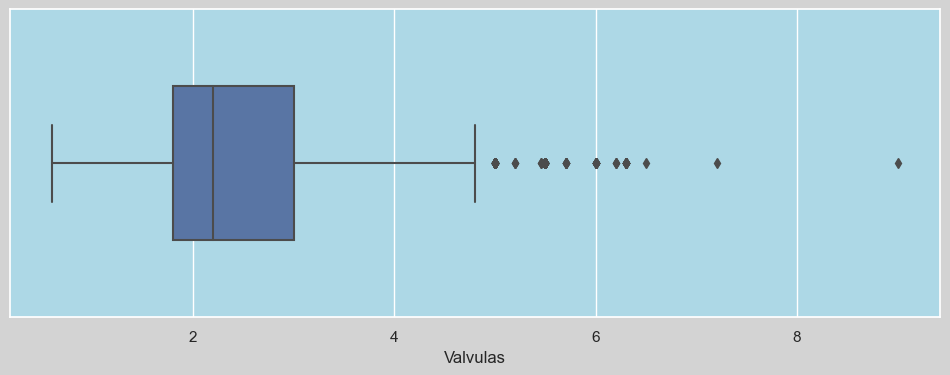

In [8]:
plt.figure(figsize=(12,4))
fig2 = sns.boxplot(x=df["Valvulas"],width=0.5)
fig1.set_xlabel('Válvulas ', fontsize=16)
plt.show()


---
---
---


In [9]:
bold(f'Tamanho dataset antes: {tam1}\nTamanho dataset depois: {tam2}')
bold(f'{((tam1-tam2)/len(df))*100:.1f}% do conjunto total de dados')
bold(f'\n\n**{tam1-tam2} linhas com outliers acima da média removidos**')

Tamanho dataset antes: 4345
Tamanho dataset depois: 4324
0.5% do conjunto total de dados


**21 linhas com outliers acima da média removidos**


----
----
----

- **Apesar de haver carros com preços extremamente diferentes ao redor do mundo, neste dataset, esses valores compoem mais outliers que podem comprometer a eficácia do nosso modelo.**

### Por isso, iremos tratá-los também.

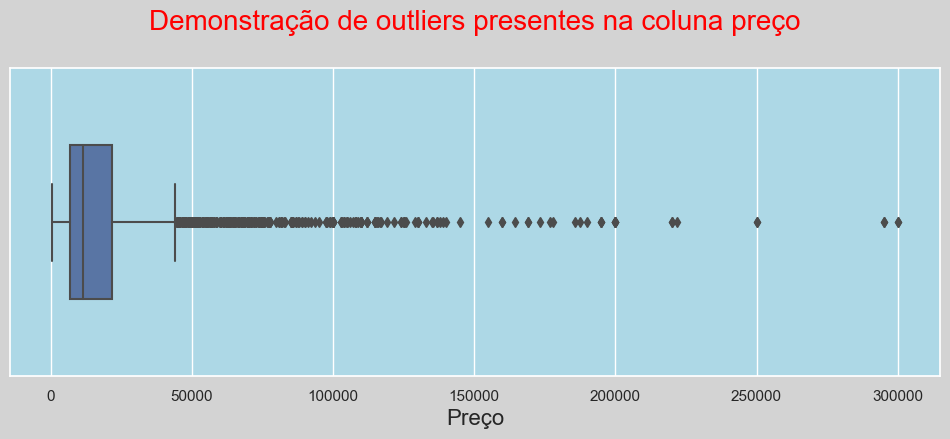

In [10]:
plt.figure(figsize=(12,4))
fig3 = sns.boxplot(x=df['Preco'],width=0.5)
tam1 = len(df)
fig3.set_title('Demonstração de outliers presentes na coluna preço\n',fontsize=20, color='red')
fig3.set_xlabel('Preço', fontsize=16)
plt.show()

#### Tratando os outliers com base na diferença entre o desvio padrão médio


In [11]:
z = stats.zscore(df['Preco'],nan_policy='omit')
outliers = z.loc[np.abs(z) > 2]
df = df.drop(outliers.keys())
tam2 = len(df)

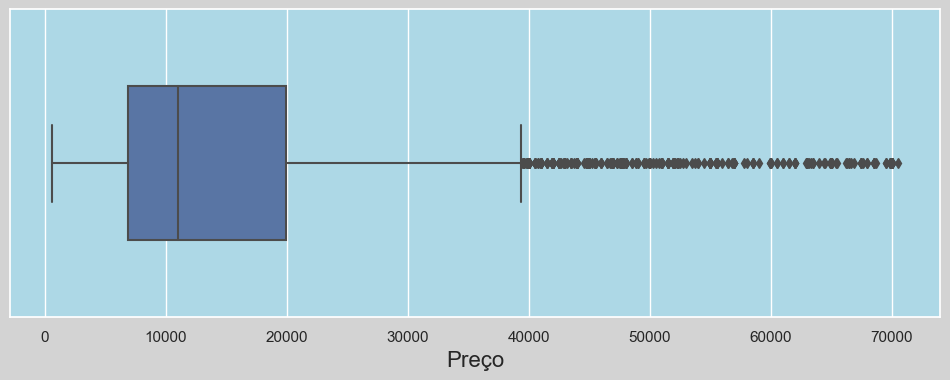

In [12]:
plt.figure(figsize=(12,4))
fig4 = sns.boxplot(x=df['Preco'],width=0.5)
fig4.set_xlabel('Preço', fontsize=16)
plt.show()

In [13]:
bold(f'Tamanho dataset antes: {tam1}\nTamanho dataset depois: {tam2}')
bold(f'\n\n**{tam1-tam2} linhas com outliers acima da média removidos**')

Tamanho dataset antes: 4324
Tamanho dataset depois: 4162


**162 linhas com outliers acima da média removidos**


---
---
---

## Com os outliers tratados (casos mais "extremos"), agora, iremos tratar os dados faltantes.

A princípio, removeremos os outliers com dropna, mas iremos treinar modelos mesmo com dados ausentes e comparar os resultados.

### Dados faltantes

In [14]:
tam1 = len(df)
nan = pd.DataFrame(df.isnull().sum(),columns=['Dados ausentes'])
bold('**Quantidade de dados faltantes por coluna:**')
nan

**Quantidade de dados faltantes por coluna:**


,Dados ausentes
Marca,0
Preco,171
Tipo,0
KM/1000,0
Valvulas,147
Combustivel,0
Registro,0
Ano,0
Modelo,0


In [15]:
df = df.dropna()

In [16]:
bold('Novos dados ajustados:')
pd.DataFrame(df.isnull().sum(), columns=["Dados ausentes"])

Novos dados ajustados:


,Dados ausentes
Marca,0
Preco,0
Tipo,0
KM/1000,0
Valvulas,0
Combustivel,0
Registro,0
Ano,0
Modelo,0


In [17]:
bold(f'Tamanho dataset antes: {tam1}\nTamanho dataset depois: {len(df)}')
bold(f'\n\n**{tam1-len(df)} linhas com dados faltantes removidos**')


Tamanho dataset antes: 4162
Tamanho dataset depois: 3846


**316 linhas com dados faltantes removidos**


In [18]:
variacao_percentual = float(f'{((init_size-len(df))/init_size) * 100:.1f}')
bold(f'Dados iniciais: {init_size}\nDados após tratamentos: {len(df)}\nTotal de tratamentos: {init_size-len(df)}\nPorcentagem: {variacao_percentual}% ')


Dados iniciais: 4345
Dados após tratamentos: 3846
Total de tratamentos: 499
Porcentagem: 11.5% 


---
---
---

Min: 600.0
Max: 70500.0
Média: 15543.501


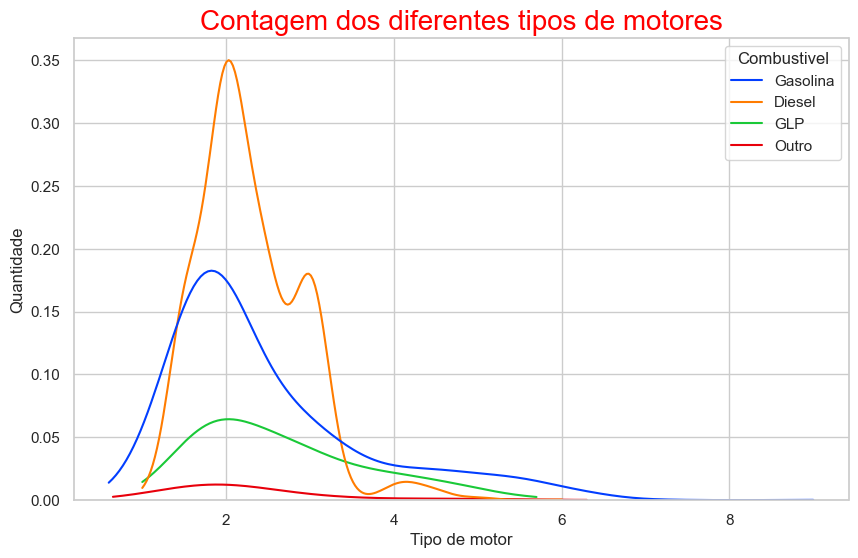

In [19]:
sns.set(style='whitegrid',palette='bright')
plt.figure(figsize=(10,6))


print('Min:', df['Preco'].min())
print('Max:', df['Preco'].max())
print(f'Média: {df["Preco"].mean():.3f}')

kde = sns.kdeplot(x=df['Valvulas'],hue=df['Combustivel'],bw_adjust=1.5,cut=0)
kde.set_title('Contagem dos diferentes tipos de motores',fontsize=20,color='red')
kde.set_ylabel('Quantidade')
kde.set_xlabel('Tipo de motor')

plt.show()

---
---
---
## **Analise descritiva dos dados - 2 pontos**

3 - Faça uma análise exploratória dos dados, utilizando gráficos e tabelas para realizar correlações entre os atributos e que permitam criar um cenário de correlação entre eles.

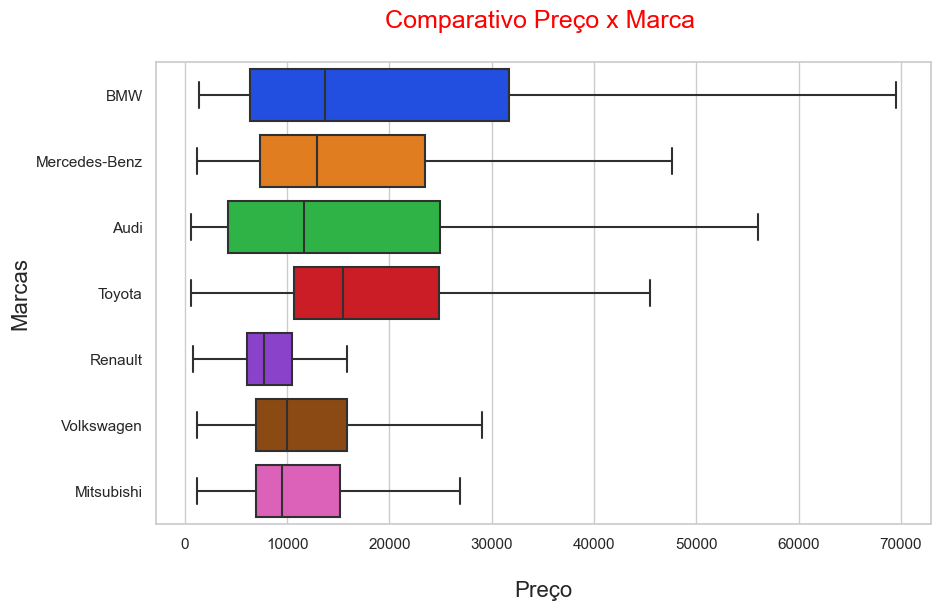

In [20]:
sns.set(style='whitegrid',palette='bright')
plt.figure(figsize=(10,6))

box_preco_marca = sns.boxplot(data=df,x='Preco',y='Marca',showfliers=False)

box_preco_marca.set_title('Comparativo Preço x Marca \n',fontsize=18,color='red')
box_preco_marca.set_ylabel('Marcas', fontsize=16)
box_preco_marca.set_xlabel('\nPreço', fontsize=16)

plt.show()

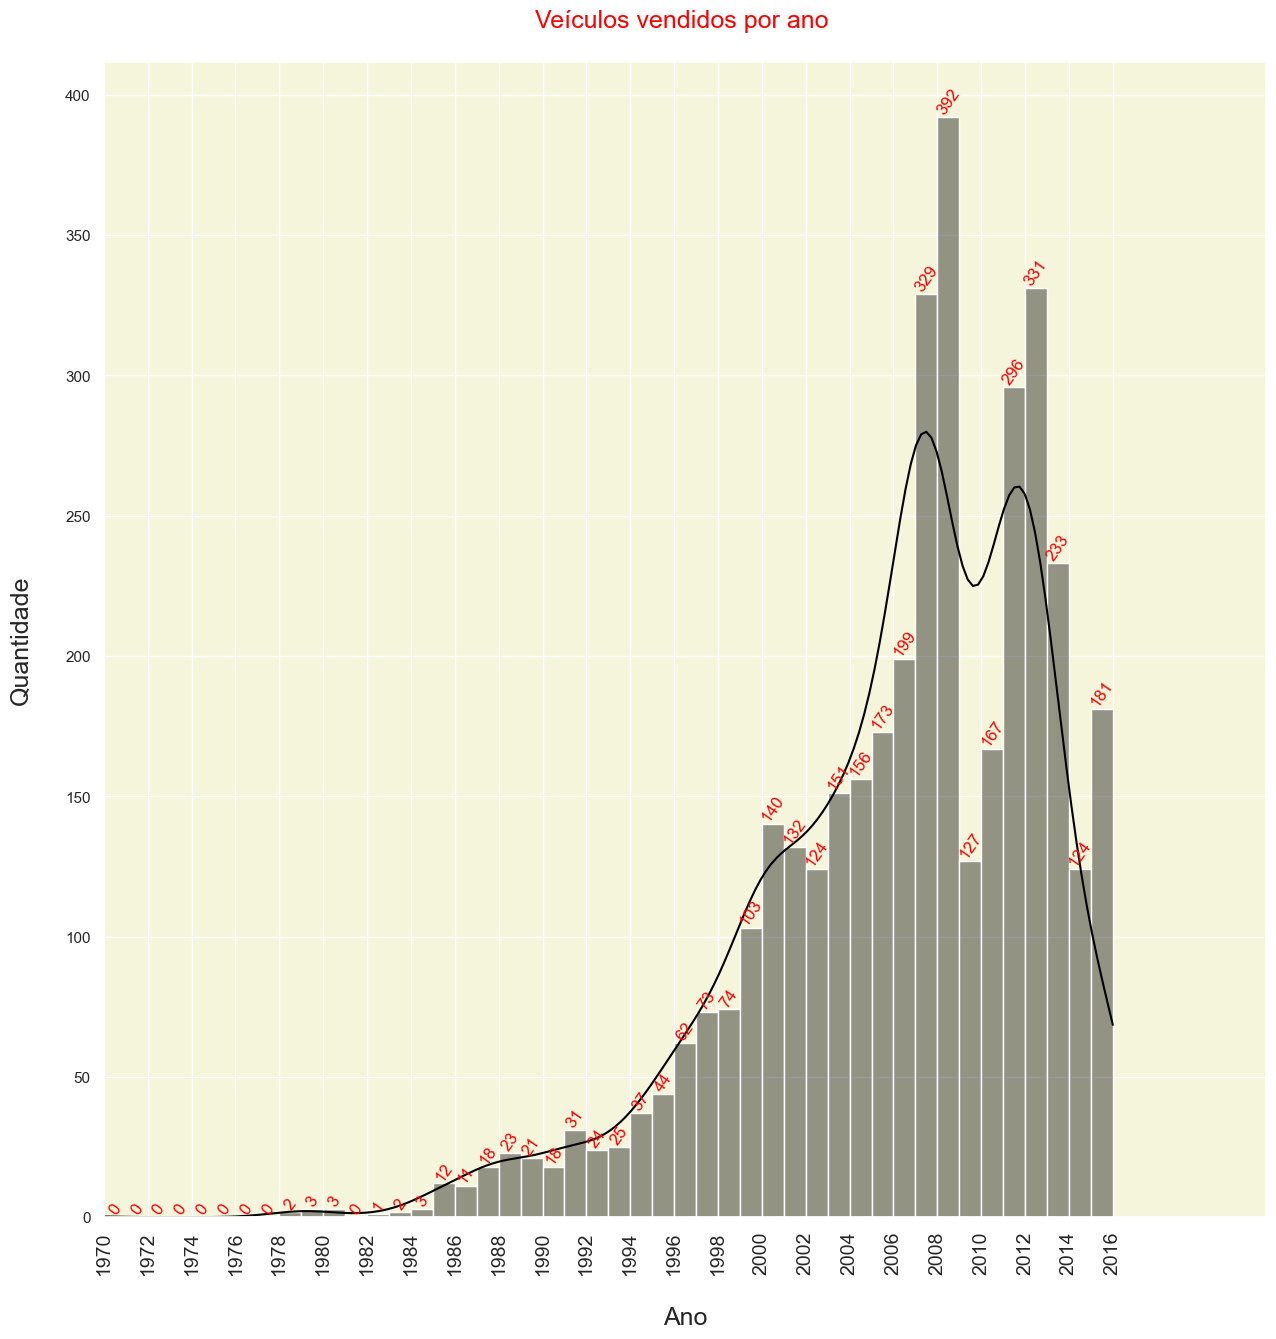

In [21]:
sns.set(rc={'axes.facecolor':'beige', 'figure.facecolor':'white'})

plt.figure(figsize=(15,15))
hist_ano = sns.histplot(data=df,x=df['Ano'],color='black',binwidth=1,alpha=0.4,kde=True)

for i in hist_ano.containers:
    hist_ano.bar_label(i,fontsize=12,rotation=55,color='red')

hist_ano.set_title('Veículos vendidos por ano \n',fontsize=18,color='red')
hist_ano.set_xlabel('\nAno',fontsize=18)
hist_ano.set_ylabel('Quantidade\n',fontsize=18)

plt.xlim(1970,2023)
plt.xticks(np.arange(1970, 2017, 2),rotation=90,fontsize=14)

plt.show()

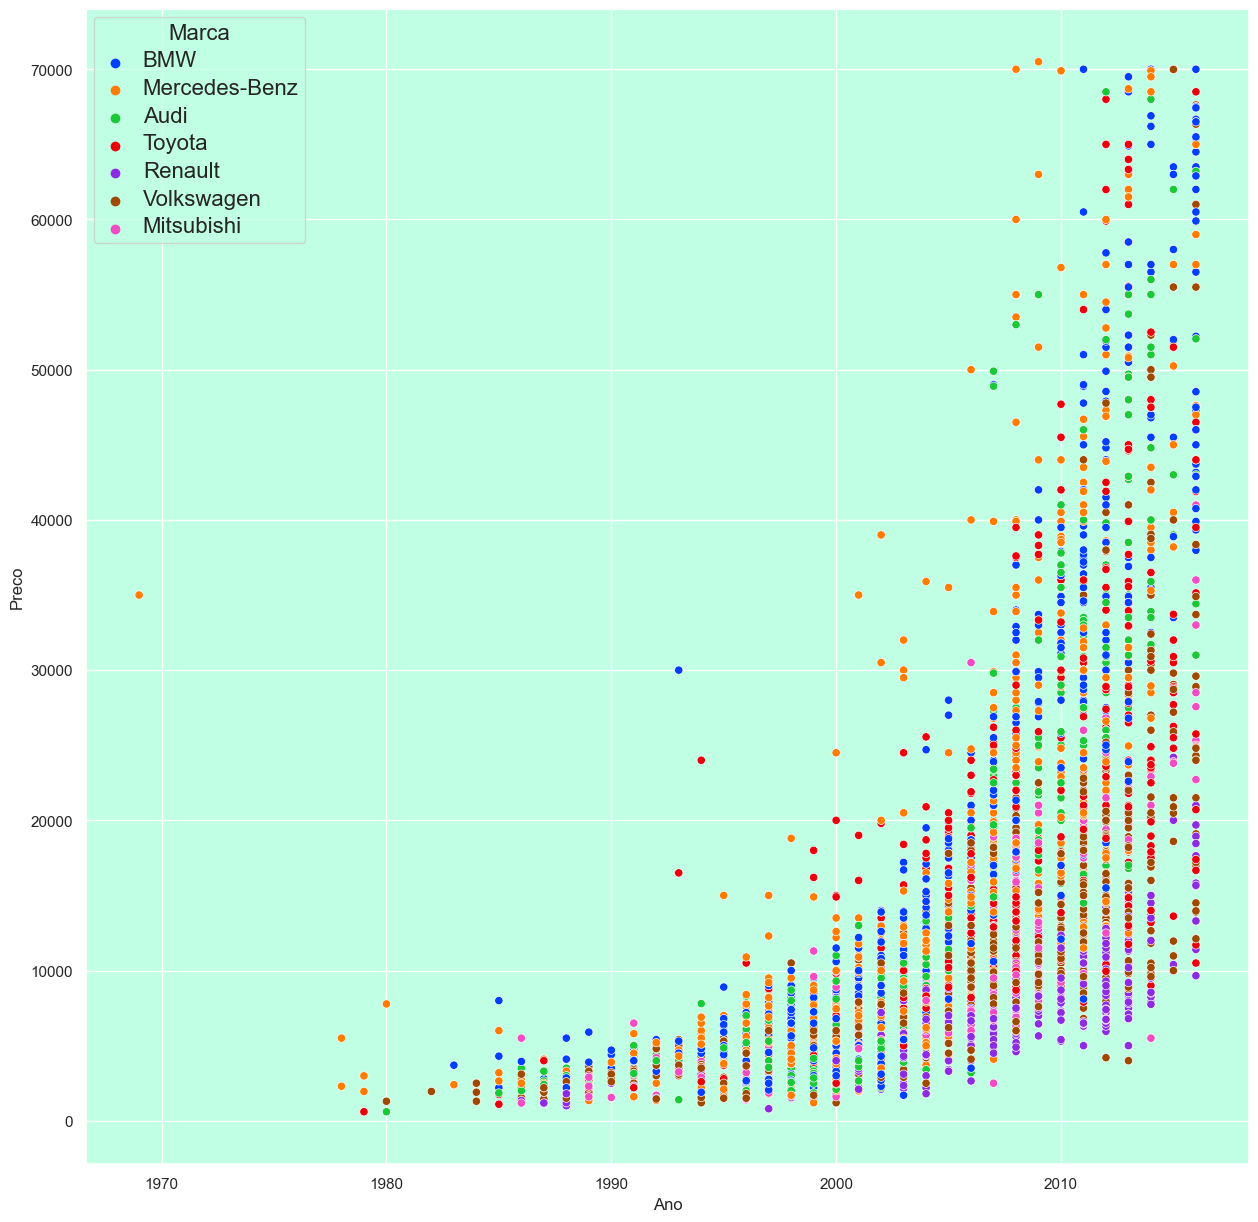

In [22]:
sns.set(rc={'axes.facecolor':'#C1FFE4', 'figure.facecolor':'white'},palette='bright')
plt.figure(figsize=(15,15))
fig5 = sns.scatterplot(data=df,y='Preco',x='Ano',hue='Marca')

plt.setp(fig5.get_legend().get_texts(), fontsize='16') 
plt.setp(fig5.get_legend().get_title(), fontsize='16') 

plt.show()

In [23]:
df

,Marca,Preco,Tipo,KM/1000,Valvulas,Combustivel,Registro,Ano,Modelo
0,BMW,4200.0,sedan,445.79,2.0,Gasolina,sim,1991,320
1,Mercedes-Benz,7900.0,van,687.19,2.9,Diesel,sim,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,576.14,5.0,GLP,sim,2003,S 500
3,Audi,23000.0,crossover,386.24,4.2,Gasolina,sim,2007,Q7
4,Toyota,18300.0,crossover,193.12,2.0,Gasolina,sim,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,262.32,2.5,Diesel,sim,2008,T5 (Transporter)
4339,Toyota,17900.0,sedan,56.33,1.6,Gasolina,sim,2014,Corolla
4341,BMW,6500.0,sedan,1.61,3.5,Gasolina,sim,1999,535
4342,BMW,8000.0,sedan,312.21,2.0,Gasolina,sim,1985,520


In [24]:
len(df['Ano'].unique())

39

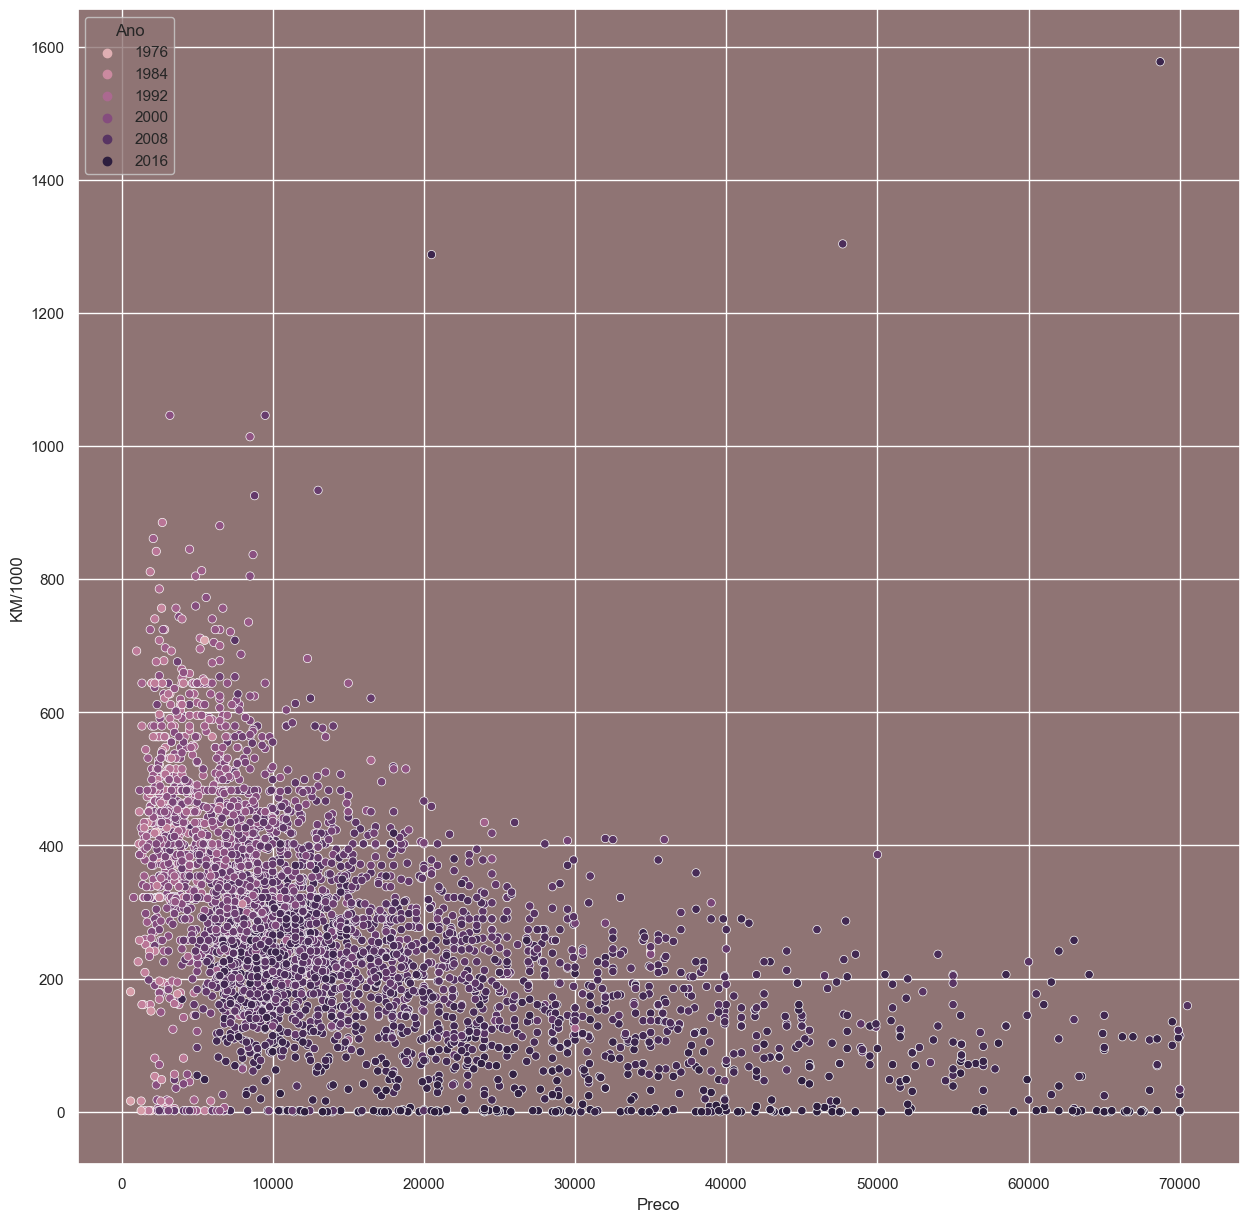

In [41]:
sns.set(rc={'axes.facecolor':'#8F7474'},palette='bright')
plt.figure(figsize=(15,15))

sns.scatterplot(data=df, x='Preco',y='KM/1000',hue='Ano')
plt.show()

---
---
---
## **Desenvolvimento do Modelo - 2 pontos**

4 - O conjunto de dados indica a aplicação de qual modelo de aprendizagem de máquina para responder a pergunta do desafio? Por quê? (1,0)

> **Resposta: O desafio nos fornece um conjunto de dados rotulados e nos desafia a predizer o (possível) preço deste veículo, caso fosse posto à venda. Com base nessa informação, o modelo de ML mais adequado para atender ao desafio em questão é algum modelo, dentre os vários existentes, relacionados à regressão.**

5 - Qual a técnica sugerida para este projeto? Por quê? (1,0)

> **Resposta: Por se tratar de um dataset rotulado, com entradas e saídas já estabelecidas, a técnica exigida para o projeto é a supervisionada.**

Com base nas suas respostas, agora escolha dois algortimos para implementar e comparar a performance de cada um deles ao final do desafio.

>**Resposta:**<br>
**Algoritmo 1: Linear Regression**<br>
**Algoritmo 2: Random Forest Regressor + Gradient Boosting Regressor + XGB**


## **Treinamento e teste do Modelo - 3 pontos**

6 - Crie um subset dos dados que serão utilizados para o treinamento e para o teste do modelo. Divida este subset em treino e teste. (1,0) 

> - **Os subsets serão criados de acordo com os modelos, em seus respectivos campos para evitar confusão.**

In [26]:
df_test = df.copy()
df_test['Marca'] = df_test['Marca'].replace('BMW',1).replace('Mercedes-Benz',2).replace('Toyota',3).replace('Renault',4).replace('Volkswagen',5).replace('Mitsubishi',6).replace('Audi',7)
df_test['Tipo'] = df_test['Tipo'].replace('sedan',1).replace('van',2).replace('crossover',3).replace('vagon',4).replace('outro',5).replace('hatch',5)
df_test['Combustivel'] = df_test['Combustivel'].replace('Gasolina',1).replace('Diesel',2).replace('GLP',3).replace('Outro',4)
df_test['Registro'] = df_test['Registro'].replace('nao',0).replace('sim',1)

### Dummy Regressor
---
- Modelo básico de regressão para estabelecimento de uma baseline ou referência. Serve para compararmos com os futuros modelos e estabelecer sua precisão e eficácia.
---
- A feature escolhida não importa muito para este modelo de baseline na maioria dos casos, portanto, criaremos apenas um modelo de baseline.

In [27]:
np.random.seed(SEED)

X = df_test[['Ano']]
y = df_test[['Preco']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3)

dummy = DummyRegressor(strategy='median').fit(X_train, y_train)
y_pred = dummy.predict(X_test)

bold('Métricas do modelo Dummy\n')
metricas(y_test,y_pred)

Métricas do modelo Dummy

MAE=>  9,031.04
MAPE=> 0.81
RMSE=> 95.03
R2=>   -0.12


In [28]:
np.random.seed(SEED)

X = df_test.drop(axis=1, columns=['Preco','Modelo'])
y = df_test[['Preco']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3)

dummy = DummyRegressor(strategy='median').fit(X_train, y_train)
y_pred = dummy.predict(X_test)

bold('Métricas do modelo Dummy com mais features\n')
metricas(y_test,y_pred)

Métricas do modelo Dummy com mais features

MAE=>  9,031.04
MAPE=> 0.81
RMSE=> 95.03
R2=>   -0.12


---
---
---

7 - Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.


7.1 - Algoritmo 1: (0,5)


### Regressão Linear Simples e Múltipla
---
- Modelo que utiliza uma ou mais variáveis que se correlacionam (ou não) para poder predizer um valor futuro, com base nas mesmas variáveis utilizadas para o treino.

In [29]:
np.random.seed(SEED)

X = df_test[['Ano']]
y = df_test[['Preco']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3)

lrs = LinearRegression().fit(X_train, y_train)
y_pred = lrs.predict(X_test)

bold('Métricas do modelo de regressão linear simples, com apenas uma feature:\n')
metricas(y_test,y_pred)

Métricas do modelo de regressão linear simples, com apenas uma feature:

MAE=>  7,751.30
MAPE=> 0.80
RMSE=> 88.04
R2=>   0.35


In [30]:
np.random.seed(SEED)

X = df_test.drop(axis=1, columns=['Preco','Modelo'])
y = df_test[['Preco']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

lrm = LinearRegression().fit(X_train, y_train)
y_pred = lrm.predict(X_test)

bold('Métricas do modelo de regressão linear múltipla, com quatro features adaptadas para o treino:')
metricas(y_test,y_pred)

Métricas do modelo de regressão linear múltipla, com quatro features adaptadas para o treino:
MAE=>  5,634.56
MAPE=> 0.62
RMSE=> 75.06
R2=>   0.61


| MODELO | MAE | MAPE | RMSE | R2 |
| :------- | :------- | :------: | :------: | :------: |
| Regressor Dummy| 9031.04 | 0.81 | 95.03 | -0.12 |
| Reg. Linear Simples| 7751.30 | 0.80 | 88.04 | 0.35 |
| Reg. Linear Mult.| 5634.56 | 0.62 | 75.06 | 0.61 |


---
---
---

7.2 - Algoritmo 2:  (0,5)

### Random Forest Regressor
---
- Modelo baseado em árvore de decisões, ou um conjunto de árvores. Os dados de cada ramificação são separados de forma quase aleatória, criando amostras (samples) dos dados originais e obtendo seu resultado final com base nessas amostras.
---
- O resultado final é baseado na média dos resultados das ramificações geradas pelo modelo, ramificações estas que pode variar em quantidade, de acordo com os parâmetros utilizados no treinamento do modelo. O parâmetro "n_estimators" determina a quantidade de ramificações que o modelo executará, porém não necessariamente aumentará a eficiência do modelo, sendo necessário que testes sejam realizados até encontrar o "sweet spot".
---
- Há também o risco de "overfitting", ou sobreajuste, enviesar o modelo a tal ponto que não se trate mais de uma predição, e sim, uma mera releitura do dado; ou seja, sua previsão será sempre perfeita e certeira.

In [31]:
np.random.seed(SEED)

X = df_test.drop(axis=1, columns=['Preco','Modelo'])
y = df_test[['Preco']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3)

rf_reg = RandomForestRegressor(n_estimators = 200).fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

bold('Métricas do Random Forest Regressor')
metricas(y_test,y_pred)

Métricas do Random Forest Regressor
MAE=>  2,635.48
MAPE=> 0.21
RMSE=> 51.34
R2=>   0.88


### Gradient Boosting Regressor
---
- Modelo semelhante ao Random Forest, porém, diferentemente do Random Forest, as árvores são sequenciais e a cada nova sequência o modelo tenta ajustar os resultados obtidos pela ramificação anterior.
---
- Enquanto a média calculada no modelo de Random Forest resulta em uma média aritmética, a média resultante do Gradient Boosting é ponderada. 
---
- No Grad. Boost., a ramificação sucessora sempre tentará diminuir os erros da ramificação anterior, e as que tiverem maior impacto nesta queda, receberão um peso maior na ponderação da média.

In [32]:
np.random.seed(SEED)
X = df_test.drop(axis=1, columns=['Preco','Modelo'])
y = df_test[['Preco']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)

gbr_reg = GradientBoostingRegressor(n_estimators = 200).fit(X_train, y_train)
y_pred = gbr_reg.predict(X_test)

bold('Métricas do Gradient Boosting Regressor')
metricas(y_test,y_pred)

Métricas do Gradient Boosting Regressor
MAE=>  2,635.32
MAPE=> 0.21
RMSE=> 51.34
R2=>   0.90


### Extreme Gradient Boosting Regressor
---
- Modelo mais robusto do Gradient Boosting tradicional.


In [33]:
np.random.seed(SEED)
X = df_test.drop(axis=1, columns=['Preco','Modelo'])
y = df_test[['Preco']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)

xgb_reg = XGBRegressor(n_estimators = 200).fit(X_train.values, y_train)
y_pred = xgb_reg.predict(X_test)

bold('Métricas do Extreme Gradient Boosting Regressor')
metricas(y_test,y_pred)

Métricas do Extreme Gradient Boosting Regressor
MAE=>  2,563.58
MAPE=> 0.21
RMSE=> 50.63
R2=>   0.89


<table style="width: 100%;border: 3px solid black;border-collapse: collapse">
    <thead style="font-weight: 600;font-size: 20px">
        <tr style="background-color: lightgray">
            <th style="text-align: center">MODELO</th>
            <th style="text-align: center">MAE</th>
            <th style="text-align: center">MAPE</th>
            <th style="text-align: center">RMSE</th>
            <th style="text-align: center">R²</th>
        </tr>
    </thead>
<tbody style="font-size: 20px">
    <tr style="border: 3px solid black">
      <td style="font-weight: 600;background-color: lightgreen;border-right: 3px solid black">Regressor Dummy</td>
      <td style="border-right: 3px solid black">9031.04</td>
      <td style="border-right: 3px solid black">0.81</td>
      <td style="border-right: 3px solid black">95.03</td> 
      <td style="border-right: 3px solid black">-0.12</td> 
    </tr>
    <tr style="border: 3px solid black">
      <td style="font-weight: 600;background-color: lightgreen;border-right: 3px solid black">Regressão Linear Simples</td>
      <td style="border-right: 3px solid black">7751.30</td>
      <td style="border-right: 3px solid black">0.80</td>
      <td style="border-right: 3px solid black">88.04</td>
      <td style="border-right: 3px solid black">0.35</td>
    </tr>
    <tr style="border: 3px solid black">
      <td style="font-weight: 600;background-color: lightgreen;border-right: 3px solid black"style="font-weight: 600;background-color: lightgreen;border-right: 3px solid black">Regressão Linear Múltipla</td>
      <td style="border-right: 3px solid black">5634.56</td>
      <td style="border-right: 3px solid black">0.62</td>
      <td style="border-right: 3px solid black">75.06</td>
      <td style="border-right: 3px solid black">0.61</td>
    </tr>
    <tr style="border: 3px solid black">
      <td style="font-weight: 600;background-color: lightgreen;border-right: 3px solid black">Random Forest Regressor</td>
      <td style="border-right: 3px solid black">2635.48</td>
      <td style="border-right: 3px solid black">0.21</td>
      <td style="border-right: 3px solid black">51.34</td>
      <td style="border-right: 3px solid black">0.88</td>
    </tr>
    <tr style="border: 3px solid black">
      <td style="font-weight: 600;background-color: lightgreen;border-right: 3px solid black">Gradient Boosting Regressor</td>
      <td style="border-right: 3px solid black">2635.32</td>
      <td style="border-right: 3px solid black">0.21</td>
      <td style="border-right: 3px solid black">51.34</td>
      <td style="border-right: 3px solid black">0.90</td>
    </tr>
    <tr style="border: 3px solid black">
      <td style="font-weight: 600;background-color: lightgreen;border-right: 3px solid black">Extreme Gradient Boosting Regressor</td>
      <td style="border-right: 3px solid black">2563.58</td>
      <td style="border-right: 3px solid black">0.21</td>
      <td style="border-right: 3px solid black">50.63</td>
      <td style="border-right: 3px solid black">0.89</td>
    </tr>
</tbody>
</table>

7.3 - Qual dos algortimos obteve melhor resultado? Por quê? (1,0)



> **Resposta: Os algoritmos derivados do Random Forest Regressor obtiveram as melhores métricas. Os três algoritmos obtiveram métricas bem semelhantes, com uma diferença final quase que imperceptível, mas que na hora da predição com certeza imactará na resposta do desafio.**


## **Modelo de Produção: Teste com novos dados - 1 ponto**

8 - Use o seu modelo treinado para responder a pergunta do desafio:

In [34]:
media_valvulas_predict = df['Valvulas'].mean()

In [35]:
# Volkswagen Sedan 2.0 a gasolina, ano 2005, com cerca de 172095 km rodados
predicao_dummy = dummy.predict([[5,1,172.095,media_valvulas_predict,1,1,2005]])

predicao_lrm = lrm.predict([[5,1,172.095,media_valvulas_predict,1,1,2005]])

predicao_gbr = gbr_reg.predict([[5,1,172.095,media_valvulas_predict,1,1,2005]])

predicao_rf = rf_reg.predict([[5,1,172.095,media_valvulas_predict,1,1,2005]])

predicao_xgb = xgb_reg.predict([[5,1,172.095,media_valvulas_predict,1,1,2005]])

bold('PREÇO FINAL DE ACORDO COM CADA MODELO TREINADO')
print(f'Dummy Regressor = {float(str(predicao_dummy).replace("[","").replace("]","")):,.2f}')
print(f'Regressão Linear Múltipla = {float(str(predicao_lrm).replace("[","").replace("]","")):,.2f}')
print(f'Random Forest Regressor = {float(str(predicao_rf).replace("[","").replace("]","")):,.2f}')
print(f'Gradient Boosting Regressor = {float(str(predicao_gbr).replace("[","").replace("]","")):,.2f}')
print(f'Extreme Gradient Boosting Regressor = {float(str(predicao_xgb).replace("[","").replace("]","")):,.2f}')

PREÇO FINAL DE ACORDO COM CADA MODELO TREINADO
Dummy Regressor = 11,000.00
Regressão Linear Múltipla = 15,623.63
Random Forest Regressor = 11,409.65
Gradient Boosting Regressor = 10,593.57
Extreme Gradient Boosting Regressor = 10,888.06
